# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os 
import scipy.stats as st

from datetime import date
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as its being processed (with the city number and city name).


In [26]:
#set query url and unit measuremnt type
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set lists to hold df values
name = []
country = []
lat = []
lon = []
max_temp = []
hum = []
clouds = []
wind_speed = []
date = []

#set record and set count
record = 0
set_count = 1

#format print log
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for index, city in enumerate(cities, start = 1): 
    response = requests.get(query_url + city).json()
    #pprint(response)
    
    try:
        name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])       
        city_name = response["name"]
        
        if record > 49:
            record = 0
            set_count = set_count + 1
        else:
            record = record + 1
            
        print(f"Processing Record {record} of Set {set_count} | {city_name}")
        
        time.sleep(1)
        
    except:
        print(f"City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Hobart
Processing Record 2 of Set 1 | College Station
Processing Record 3 of Set 1 | Kapaa
Processing Record 4 of Set 1 | Torbay
Processing Record 5 of Set 1 | Vila Franca do Campo
Processing Record 6 of Set 1 | Vaitape
Processing Record 7 of Set 1 | Takoradze
Processing Record 8 of Set 1 | Karratha
Processing Record 9 of Set 1 | Saint Paul Harbor
Processing Record 10 of Set 1 | Miquelon
Processing Record 11 of Set 1 | Hilo
Processing Record 12 of Set 1 | Cabra
Processing Record 13 of Set 1 | Busselton
Processing Record 14 of Set 1 | Baykit
Processing Record 15 of Set 1 | Ribeira Grande
Processing Record 16 of Set 1 | Punta Arenas
Processing Record 17 of Set 1 | Puerto Ayora
Processing Record 18 of Set 1 | Chokurdakh
Processing Record 19 of Set 1 | Codrington
Processing Record 20 of Set 1 | Diphu
Processing Record 21 of Set 1 | Kushmurun
City not found. Skipping...
Processing Record 22 of Set 1 | Gr

Processing Record 35 of Set 4 | Victor Harbor
Processing Record 36 of Set 4 | Santa Cruz de la Sierra
Processing Record 37 of Set 4 | Waddān
Processing Record 38 of Set 4 | La Asuncion
Processing Record 39 of Set 4 | Provideniya
City not found. Skipping...
Processing Record 40 of Set 4 | Praia
Processing Record 41 of Set 4 | Vanimo
Processing Record 42 of Set 4 | Corning
Processing Record 43 of Set 4 | San Francisco
Processing Record 44 of Set 4 | Havelock
Processing Record 45 of Set 4 | Rawson
Processing Record 46 of Set 4 | Leningradskiy
Processing Record 47 of Set 4 | Madang
Processing Record 48 of Set 4 | San Patricio
Processing Record 49 of Set 4 | Laguna
City not found. Skipping...
Processing Record 50 of Set 4 | Komsomolets
Processing Record 0 of Set 5 | Tottori-shi
Processing Record 1 of Set 5 | Caravelas
Processing Record 2 of Set 5 | Esperance
Processing Record 3 of Set 5 | Wanning
Processing Record 4 of Set 5 | Pevek
Processing Record 5 of Set 5 | Maragogi
Processing Record 

Processing Record 18 of Set 8 | Nuuk
Processing Record 19 of Set 8 | Arroyo de la Encomienda
Processing Record 20 of Set 8 | Werda
City not found. Skipping...
Processing Record 21 of Set 8 | Carutapera
Processing Record 22 of Set 8 | Pahlgām
City not found. Skipping...
Processing Record 23 of Set 8 | Rantepao
Processing Record 24 of Set 8 | Province of Mantua
Processing Record 25 of Set 8 | Port Blair
Processing Record 26 of Set 8 | Bilma
Processing Record 27 of Set 8 | Kilindoni
Processing Record 28 of Set 8 | Jining
Processing Record 29 of Set 8 | Rumilly
Processing Record 30 of Set 8 | KwaDukuza
Processing Record 31 of Set 8 | Colares
Processing Record 32 of Set 8 | Sola
Processing Record 33 of Set 8 | Pouébo
Processing Record 34 of Set 8 | Cervo
City not found. Skipping...
Processing Record 35 of Set 8 | Panara
Processing Record 36 of Set 8 | Casa Grande
Processing Record 37 of Set 8 | Teya
Processing Record 38 of Set 8 | Acarí
City not found. Skipping...
City not found. Skipping..

Processing Record 48 of Set 11 | San Vicente
Processing Record 49 of Set 11 | Tarangnan
Processing Record 50 of Set 11 | Prainha
Processing Record 0 of Set 12 | Mocuba
Processing Record 1 of Set 12 | Mikhaylovka
Processing Record 2 of Set 12 | Nabire
Processing Record 3 of Set 12 | Lima
Processing Record 4 of Set 12 | Xai-Xai
Processing Record 5 of Set 12 | Mangaratiba
Processing Record 6 of Set 12 | Longyearbyen
Processing Record 7 of Set 12 | Solano
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [27]:
#create df of city weather 
city_weather = pd.DataFrame({"City": name,
                             "Lat": lat,
                             "Lng": lon,
                             "Max Temp": max_temp,
                             "Humidity": hum,
                             "Cloudiness": clouds,
                             "Wind Speed": wind_speed,
                             "Country": country,
                             "Date": date})

#set output file and write df to a csv
output_file = os.path.join("..", "Output_Data", "cities.csv")

city_weather.to_csv(output_file, index=False, header=True)
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,68.00,52,75,12.75,AU,1609892714
1,College Station,30.6280,-96.3344,64.40,52,1,8.05,US,1609892615
2,Kapaa,22.0752,-159.3190,78.80,65,75,13.87,US,1609892716
3,Torbay,47.6666,-52.7314,37.99,100,90,17.22,CA,1609892718
4,Vila Franca do Campo,37.7167,-25.4333,55.40,71,75,13.87,PT,1609892719


In [28]:
#calculate descriptive statistics 
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.306986,17.250224,50.258820,74.198944,55.318662,7.789912,1.609893e+09
std,33.231738,91.558953,31.140181,19.769774,39.326592,5.699846,2.149686e+02
min,-54.800000,-179.166700,-45.810000,1.000000,0.000000,0.400000,1.609892e+09
25%,-9.035675,-65.345075,32.000000,65.750000,19.750000,3.360000,1.609893e+09
50%,22.622500,22.982350,62.600000,80.000000,67.000000,6.710000,1.609893e+09
75%,46.865850,96.860800,75.082500,88.000000,93.000000,10.875000,1.609893e+09
max,78.218600,179.316700,89.600000,100.000000,100.000000,30.310000,1.609893e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
humidity_check = city_weather.loc[city_weather["Humidity"] > 100]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

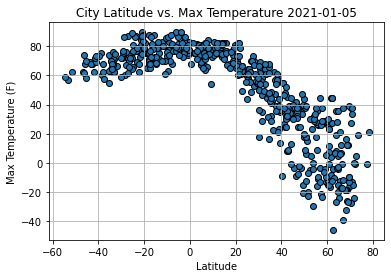

In [34]:
#set variable for current date to print 
today = date.today()

#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Max Temp"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {today}")

#save figure as png  
plt.savefig("Fig1.png", format='png')

plt.show()

This plot shows the correlation between the max temperature of cities around the world and their latitudinal location.  With 0 on the x-axis being the equator, this plot shows that the maximum temperture at locations around the equator are the warmest, and that there is a moderate negative correlation between latitude and temperature. 

## Latitude vs. Humidity Plot

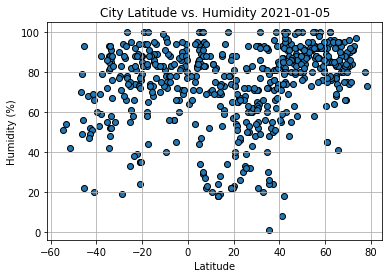

In [35]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Humidity"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {today}")

#save figure as png  
plt.savefig("Fig2.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of the city and their humidity level for the current day. Generally, it appears to show no real correlation between location and humidity levels.  

## Latitude vs. Cloudiness Plot

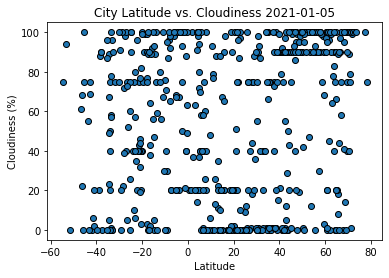

In [36]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Cloudiness"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")

#save figure as png  
plt.savefig("Fig3.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and the cloudiness level for the current day.  Generally, it appears to show no real correlation beteen latitude and cloudiness levels. 

## Latitude vs. Wind Speed Plot

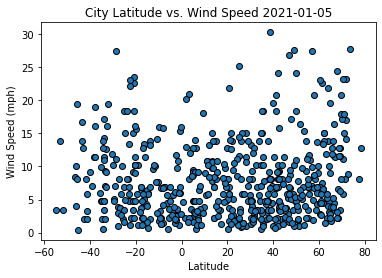

In [37]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Wind Speed"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {today}")

#save figure as png  
plt.savefig("Fig4.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and their current wind speed.  Generally, there appears to be no real correlation between location and wind speed. 

## Linear Regression

In [38]:
north = city_weather.loc[city_weather["Lat"] >= 0]
south = city_weather.loc[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8597946995526129


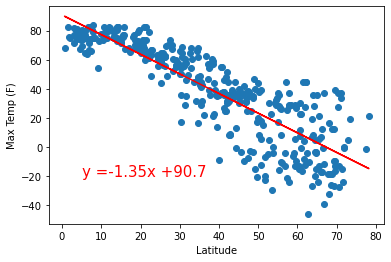

In [39]:
x = north["Lat"]
y = north["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(5, -20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5577108119877198


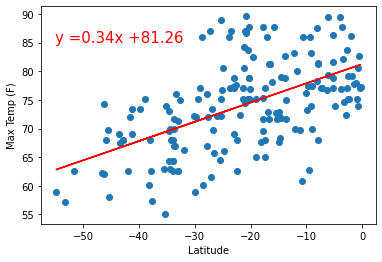

In [40]:
x = south["Lat"]
y = south["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 85), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3533116799223709


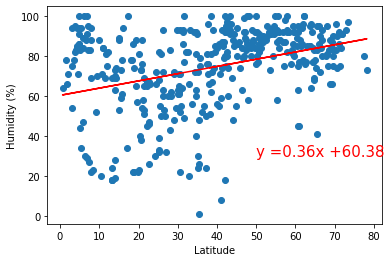

In [41]:
x = north["Lat"]
y = north["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(50, 30), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3174422366208411


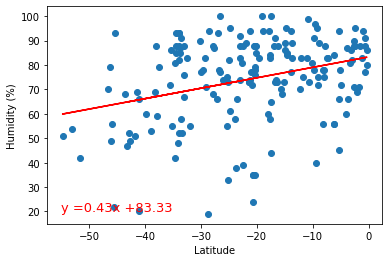

In [42]:
x = south["Lat"]
y = south["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.36049489389753886


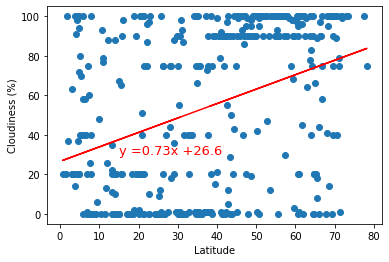

In [43]:
x = north["Lat"]
y = north["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(15, 30), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22512210815792416


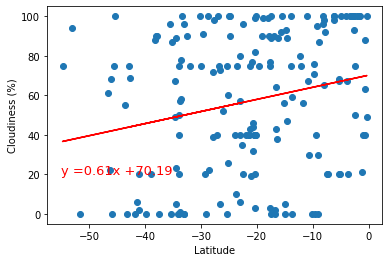

In [44]:
x = south["Lat"]
y = south["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.18048446034671672


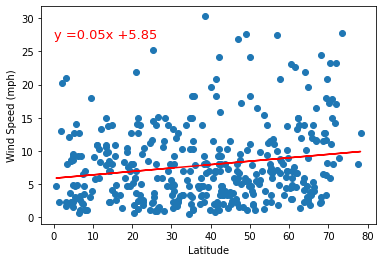

In [45]:
x = north["Lat"]
y = north["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(0, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19687610125043453


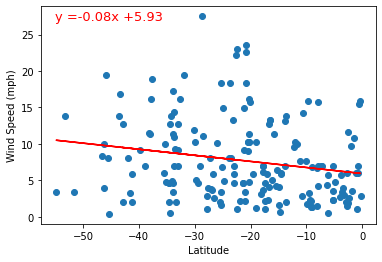

In [46]:
x = south["Lat"]
y = south["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()